In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [2]:
x = np.random.randn(1000)

In [3]:
x

array([ 3.14136174e-01, -4.67331127e-01, -3.22125341e-01, -1.62946977e+00,
        1.05845758e+00, -5.85928063e-01,  1.12285772e+00,  1.14801707e+00,
       -1.53863691e+00,  4.60100885e-01, -7.74359569e-01, -8.43628958e-01,
        2.35799479e-01,  4.87465976e-02,  6.25147760e-01, -8.37573044e-01,
        9.47772411e-01, -4.80832288e-01,  2.68728579e-01,  6.21623065e-01,
       -6.92570188e-01, -2.27480936e-01, -9.06481997e-01,  1.10272001e-02,
        8.88821452e-01, -1.59060015e+00, -5.50409933e-01,  1.94219406e+00,
        1.63716208e+00, -5.77253967e-01, -1.94569445e+00,  7.51484392e-01,
        9.62295074e-01,  1.10912829e+00, -3.94821373e-01, -1.53834399e+00,
       -1.50592427e+00,  1.22398741e+00, -1.39428757e+00, -2.07701821e+00,
        2.92770773e+00, -4.05401667e-01, -4.00961685e-01,  1.27927799e+00,
        1.45803414e-01,  1.67177228e+00, -4.31434014e-01,  8.02141367e-01,
        1.25995132e+00, -1.47740046e+00,  1.30776742e+00,  4.69604423e-01,
       -9.77099011e-02,  

In [4]:
def f(x):
    return (x**2) - (4*x) + 5

In [5]:
y = f(x)

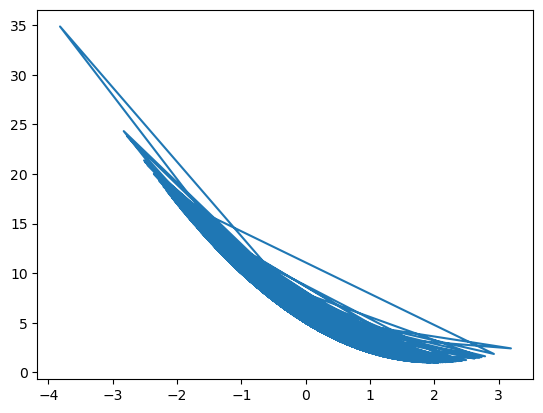

In [6]:
plt.plot(x , y)

In [7]:
def new_velocity(initial_velocity , w , c1 , c2 , r1 , r2 , posn , local_best_posn , global_best_posn):
    return (np.dot(w , initial_velocity) + (c1 * np.dot(r1 , (local_best_posn - posn))) + (c2 * np.dot(r2 , (global_best_posn - posn))))

In [8]:
def PSO(p , w = 0.8 , c1 = 0.1  , c2 = 0.1 , decay_rate = 0.2 , n_iter = 10000):
    for iteration in range(1 , n_iter+1):
        if (iteration == 1):
            r1 = np.random.random(p)
            r2 = np.random.random(p)
            posn = 10*r1 - 0.5 #This is done so that we will get both positive and negative values ,ensuring a good distribution
            velocity = r2 - 0.5
            local_best_posn = posn.copy()
            fitness = f(posn)
            global_best_fitness = min(fitness)
            global_best_posn_index = list(fitness).index(global_best_fitness)
            global_best_posn = posn[global_best_posn_index]
        else:
            r1 = np.random.random(p)
            r2 = np.random.random(p) #r1 and r2 can change for each iteration
            velocity = new_velocity(velocity , w , c1 , c2 , r1 , r2 , posn , local_best_posn , global_best_posn)
            posn = posn + velocity
            fitness = f(posn)
            global_best_fitness = min(fitness)
            global_best_posn_index = list(fitness).index(global_best_fitness)
            global_best_posn = posn[global_best_posn_index]
            local_best_posn_new = np.array([min(local_best_posn[i] , posn[i]) for i in range(len(posn)) ])
            local_best_posn = local_best_posn_new.copy()
    if (iteration%10 == 0):
        w = w - (decay_rate * w)
    return posn

In [9]:
positions = PSO(5)

In [10]:
positions

array([-1.14631571,  0.83445352,  2.54111925,  0.81553917,  0.83958381])

In [11]:
outputs = f(positions)

In [12]:
min(outputs)

1.292810045526462

In [13]:
minimum_determined = positions[list(outputs).index(min(outputs))]

In [14]:
actual_minimum = x[list(y).index(min(y))]

In [15]:
print(minimum_determined)

2.541119252592681


In [16]:
print(actual_minimum)

1.9998264963947037


In [17]:
print(min(outputs))

1.292810045526462


In [18]:
print(min(y))

1.000000030103501
